# This notebook will be used for Capstone Project

In [107]:
import requests

In [108]:
result = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
result.status_code
result.headers

{'Date': 'Wed, 06 Feb 2019 16:54:29 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Content-Length': '15514', 'Connection': 'keep-alive', 'Server': 'mw1330.eqiad.wmnet', 'X-Content-Type-Options': 'nosniff', 'P3P': 'CP="This is not a P3P policy! See https://en.wikipedia.org/wiki/Special:CentralAutoLogin/P3P for more info."', 'X-Powered-By': 'HHVM/3.18.6-dev', 'Content-language': 'en', 'Last-Modified': 'Tue, 22 Jan 2019 18:33:59 GMT', 'Backend-Timing': 'D=114261 t=1549391639646707', 'Vary': 'Accept-Encoding,Cookie,Authorization,X-Seven', 'Content-Encoding': 'gzip', 'X-Varnish': '231951344 1030530377, 335006621 270680033', 'Via': '1.1 varnish (Varnish/5.1), 1.1 varnish (Varnish/5.1)', 'Age': '80429', 'X-Cache': 'cp1081 hit/9, cp1081 hit/8', 'X-Cache-Status': 'hit-front', 'Server-Timing': 'cache;desc="hit-front"', 'Strict-Transport-Security': 'max-age=106384710; includeSubDomains; preload', 'Set-Cookie': 'WMF-Last-Access=06-Feb-2019;Path=/;HttpOnly;secure;Expires=Sun, 10 Mar 2019 12:00:

In [109]:
c = result.content

# 1st Problem


In [110]:
# import libraries
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore')

# parse the html using beautiful soup and store in variable `soup`
soup = BeautifulSoup(c, 'html.parser')
table = soup.find(lambda tag: tag.name=='table') 
table_rows = table.findAll(lambda tag: tag.name=='tr')
res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)

df = pd.DataFrame(res, columns=["Postcode", "Borough", "Neighbourhood"])
df_filtered=df[df.Borough !="Not assigned"]
#df_filtered['Neighbourhood']=df_filtered['Neighbourhood'].apply(lambda x: df_filtered['Borough'] if x == 'Not assigned' else x)
df_filtered['Neighbourhood'] = np.where(df_filtered.Neighbourhood =="Not assigned" ,df_filtered.Borough,df_filtered.Neighbourhood)

df_filtered = df_filtered.groupby(['Postcode','Borough']).agg(tuple).applymap(list)
print(df_filtered.shape)
df_filtered







(103, 1)


,,Neighbourhood
Postcode,Borough,
M1B,Scarborough,"[Rouge, Malvern]"
M1C,Scarborough,"[Highland Creek, Rouge Hill, Port Union]"
M1E,Scarborough,"[Guildwood, Morningside, West Hill]"
M1G,Scarborough,[Woburn]
M1H,Scarborough,[Cedarbrae]
M1J,Scarborough,[Scarborough Village]
M1K,Scarborough,"[East Birchmount Park, Ionview, Kennedy Park]"
M1L,Scarborough,"[Clairlea, Golden Mile, Oakridge]"
M1M,Scarborough,"[Cliffcrest, Cliffside, Scarborough Village West]"


# 2nd problem

In [111]:
import pandas as pd
df_filtered = df_filtered.reset_index()
Geospatial = pd.read_csv("Geospatial_Coordinates.csv")
Geospatial = Geospatial.rename(columns={"Postal Code": "Postcode"})
result = pd.merge(df_filtered, Geospatial, on='Postcode')
result




,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"[Rouge, Malvern]",43.806686,-79.194353
1,M1C,Scarborough,"[Highland Creek, Rouge Hill, Port Union]",43.784535,-79.160497
2,M1E,Scarborough,"[Guildwood, Morningside, West Hill]",43.763573,-79.188711
3,M1G,Scarborough,[Woburn],43.770992,-79.216917
4,M1H,Scarborough,[Cedarbrae],43.773136,-79.239476
5,M1J,Scarborough,[Scarborough Village],43.744734,-79.239476
6,M1K,Scarborough,"[East Birchmount Park, Ionview, Kennedy Park]",43.727929,-79.262029
7,M1L,Scarborough,"[Clairlea, Golden Mile, Oakridge]",43.711112,-79.284577
8,M1M,Scarborough,"[Cliffcrest, Cliffside, Scarborough Village West]",43.716316,-79.239476
9,M1N,Scarborough,"[Birch Cliff, Cliffside West]",43.692657,-79.264848


# 3rd problem

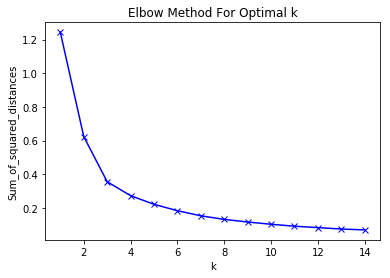

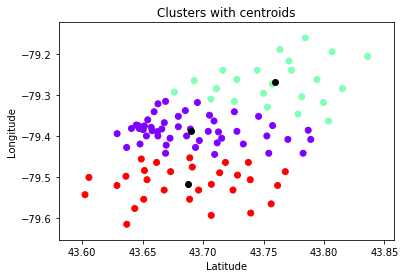

In [112]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
%matplotlib inline

#plt.scatter(result["Latitude"],result["Longitude"], label=result["Borough"]) 

result[result['Borough'].str.contains("Toronto")]

X=result.iloc[:,[3,4]]

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
 kmeans = KMeans(n_clusters=k)  
 kmeans.fit(X)  
 Sum_of_squared_distances.append(kmeans.inertia_)


plt1.plot(K, Sum_of_squared_distances, 'bx-')
plt1.xlabel('k')
plt1.ylabel('Sum_of_squared_distances')
plt1.title('Elbow Method For Optimal k')
plt1.show()

# Optimal K=3
kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)  

kmeans.cluster_centers_

plt.scatter(X['Latitude'],X['Longitude'], c=kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black') 

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clusters with centroids')
plt.show()
